# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.

In [2]:
data = pd.read_csv('../data/checker_submits.csv')
data.head()

,uid,labname,numTrials,timestamp
0,user_4,project1,1,2020-04-17 05:19:02.744528
1,user_4,project1,2,2020-04-17 05:22:45.549397
2,user_4,project1,3,2020-04-17 05:34:24.422370
3,user_4,project1,4,2020-04-17 05:43:27.773992
4,user_4,project1,5,2020-04-17 05:46:32.275104


In [3]:
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['hour'] = data['timestamp'].dt.hour
data['dayofweek'] = data['timestamp'].dt.dayofweek
df = data[['uid', 'labname', 'numTrials', 'hour', 'dayofweek']]
df.head()

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4


3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.

In [4]:
encoder = OneHotEncoder(sparse_output=False)
categorical = ['uid', 'labname']
encoded = encoder.fit_transform(df[categorical])
encoded_cols = encoder.get_feature_names_out(categorical)

In [5]:
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=df.index)
df = pd.concat([df.drop(columns=categorical), encoded_df], axis=1)
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


4. Use `StandardScaler()` and scale your continuous features.

In [6]:
scaler = StandardScaler()
continuous = ['numTrials', 'hour']
scaled = scaler.fit_transform(df[continuous])
df[continuous] = scaled
df.head()

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


5. Save the dataframe as `dayofweek.csv`.

In [7]:
df.to_csv('../data/dayofweek.csv', index=False)

6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [8]:
most_common = df['dayofweek'].mode()[0]
naive_preds = pd.Series(most_common, index=df.index)
naive_acc = accuracy_score(df['dayofweek'], naive_preds)
naive_acc

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 

In [9]:
X = df.drop(columns='dayofweek')
y = df['dayofweek']

model = LogisticRegression(random_state=21, fit_intercept=False)
model.fit(X, y)

LogisticRegression(fit_intercept=False, random_state=21)

2. Calculate the accuracy.

In [10]:
y_pred = model.predict(X)
logreg_acc = accuracy_score(y, y_pred)
logreg_acc

0.6405693950177936

3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.

In [11]:
def barh_coefficients(model, feature_names, top_n=10):
    # Logreg
    if hasattr(model, 'coef_'):
        if model.coef_.ndim == 2:
            importance = np.sum(np.abs(model.coef_), axis=0)
        else:
            importance = np.abs(model.coef_)

    # SVC
    elif hasattr(model, 'estimators_') and hasattr(model.estimators_[0], 'coef_'):
        coefs = np.array([est.coef_.ravel() for est in model.estimators_])
        importance = np.sum(np.abs(coefs), axis=0)

    # Decision Tree, Random Forest
    elif hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_

    else:
        raise TypeError("Unsupported model type")

    coef_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    })

    top_coef_df = coef_df.nlargest(top_n, 'importance')

    plt.figure()
    plt.barh(top_coef_df['feature'], top_coef_df['importance'], color='indianred')
    plt.gca().invert_yaxis()
    plt.title(f"Top-{top_n} features")
    plt.show()

4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

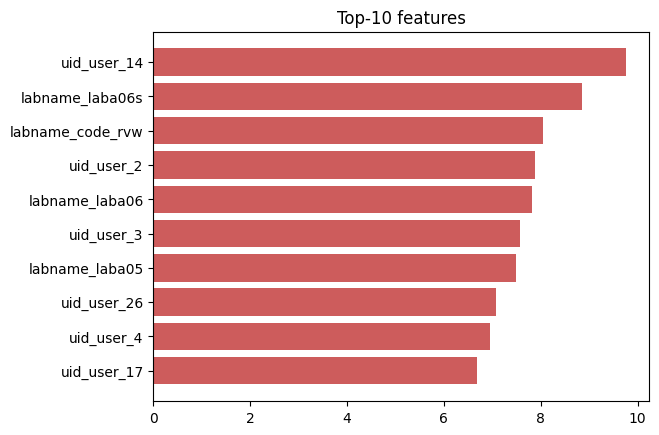

In [12]:
barh_coefficients(model, X.columns, 10)

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [13]:
model = SVC(kernel='linear', probability=True, random_state=21)
model.fit(X, y)

SVC(kernel='linear', probability=True, random_state=21)

In [14]:
best_acc = 0
best_kernel = None
best_model = None

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    model = SVC(probability=True, random_state=21, kernel=kernel)
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f'kernel: {kernel}, accuracy: {accuracy}')
    if accuracy > best_acc:
        best_acc = accuracy
        best_kernel = kernel
        best_model = model

kernel: linear, accuracy: 0.702846975088968
kernel: poly, accuracy: 0.8594306049822064
kernel: rbf, accuracy: 0.8558718861209964
kernel: sigmoid, accuracy: 0.3997627520759193


In [15]:
ovr_model = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=21))
ovr_model.fit(X, y)

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=21))

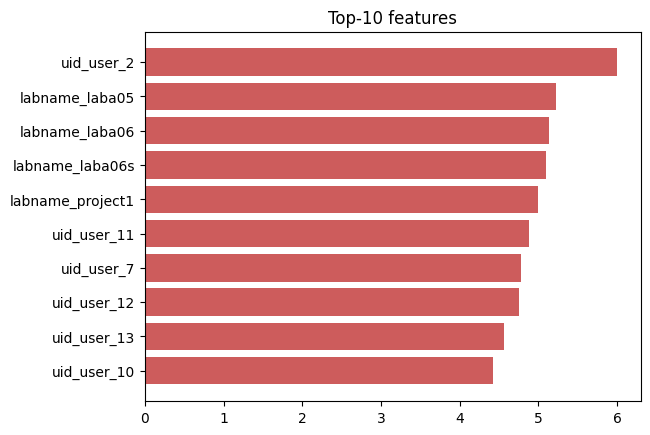

In [16]:
barh_coefficients(ovr_model, X.columns)

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [17]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
model.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=21)

In [18]:
for depth in range(1, 15):
    model = DecisionTreeClassifier(max_depth=depth, random_state=21)
    model.fit(X, y)
    y_pred = model.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print(f"max_depth={depth}, accuracy={accuracy}")

max_depth=1, accuracy=0.35765124555160144
max_depth=2, accuracy=0.4389086595492289
max_depth=3, accuracy=0.48991696322657174
max_depth=4, accuracy=0.5516014234875445
max_depth=5, accuracy=0.6109134045077106
max_depth=6, accuracy=0.6637010676156584
max_depth=7, accuracy=0.7064056939501779
max_depth=8, accuracy=0.7502965599051008
max_depth=9, accuracy=0.7846975088967971
max_depth=10, accuracy=0.8196915776986952
max_depth=11, accuracy=0.8499406880189798
max_depth=12, accuracy=0.8831553973902728
max_depth=13, accuracy=0.9104389086595492
max_depth=14, accuracy=0.9317912218268091


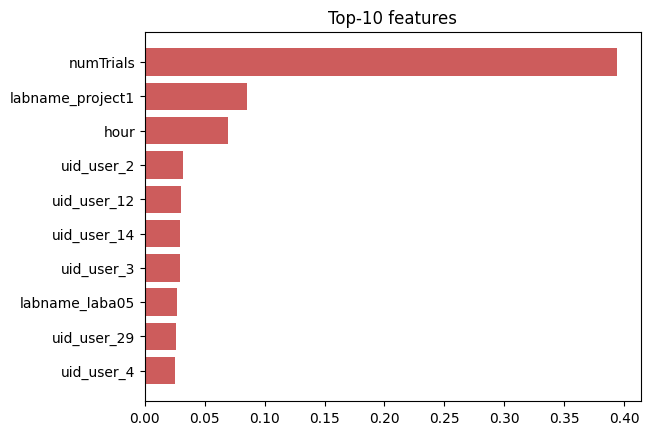

In [19]:
barh_coefficients(model, X.columns)

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [20]:
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=21)
model.fit(X, y)

RandomForestClassifier(max_depth=3, random_state=21)

In [21]:
for depth in [3, 5, 10, 15, 20, 25, 30]:
    for n_estimators in [10, 25, 50, 70, 100, 130, 150]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=depth, random_state=21)
        model.fit(X, y)
        y_pred = model.predict(X)
        acc = accuracy_score(y, y_pred)
        print(f"max_depth={depth}, n_estimators={n_estimators}, accuracy={acc}")

max_depth=3, n_estimators=10, accuracy=0.45729537366548045
max_depth=3, n_estimators=25, accuracy=0.4638196915776987
max_depth=3, n_estimators=50, accuracy=0.47034400948991695
max_depth=3, n_estimators=70, accuracy=0.4721233689205219
max_depth=3, n_estimators=100, accuracy=0.4697508896797153
max_depth=3, n_estimators=130, accuracy=0.4697508896797153
max_depth=3, n_estimators=150, accuracy=0.4697508896797153
max_depth=5, n_estimators=10, accuracy=0.603202846975089
max_depth=5, n_estimators=25, accuracy=0.5960854092526691
max_depth=5, n_estimators=50, accuracy=0.5848161328588375
max_depth=5, n_estimators=70, accuracy=0.5747330960854092
max_depth=5, n_estimators=100, accuracy=0.5794780545670225
max_depth=5, n_estimators=130, accuracy=0.5883748517200474
max_depth=5, n_estimators=150, accuracy=0.5883748517200474
max_depth=10, n_estimators=10, accuracy=0.8285883748517201
max_depth=10, n_estimators=25, accuracy=0.8819691577698695
max_depth=10, n_estimators=50, accuracy=0.8701067615658363
max_

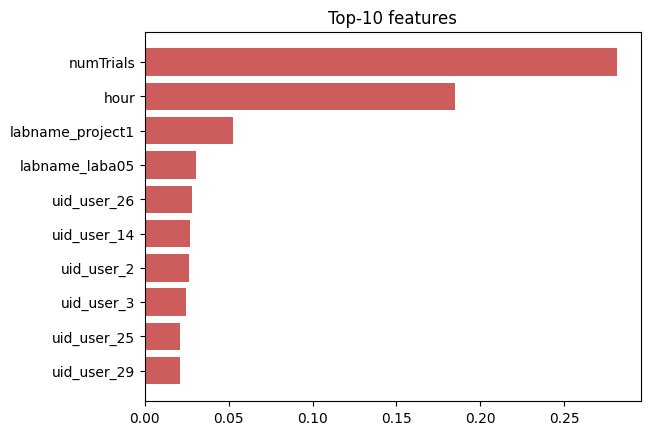

In [22]:
barh_coefficients(model, X.columns)